# Analyse biologische inspiratie

## Aanvulling/aanpassing op eerder geïmplementeerde agent-based simulation


## Experimenten

_ik ga er van uit dat we max 4 experimenten zullen uitvoeren. In dat gaval lijkt het me handig om dan per experiment de opzet en de resultaten te analyseren_ 

### Opzet experiment

__Experiment 1__



__Experiment 2__


__Experiment 3__


__Experiment 4__

### Analyse resultaten



In [1]:
import pickle as p
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_data(experiment_name: str)-> pd.DataFrame:
    """Reads the batch data from a pickle."""
    path = f'../experiments/{experiment_name}/batch_data.p'
#     return pd.DataFrame.from_dict(pd.read_pickle(path)).set_index('time')
    return pd.read_pickle(path)

In [3]:
def count_explored_tiles_agents(env_df):
    dict_agent_info = dict()
    for agent in range(env_df['agents_n'].max()):
        list_agent_info = []
        for i in range(len(env_df)):
             list_agent_info.append(env_df.iloc[i]['explored'][agent].sum())
                
        dict_agent_info[agent] = list_agent_info
    return dict_agent_info

In [4]:
def plot_batch(env_df):
    for batch in range(len(env_df)):
        sub_df = pd.DataFrame.from_dict(env_df[batch]).set_index('time')
        fig, axes = plt.subplots(1,1, figsize=(5, 5))
        
        fig.suptitle('Exploard maze by agents')
        plt.xlabel("time step")
        plt.ylabel("exploard tiles")
        plt.legend(title='Agent', loc='upper right', labels=['pathfinding agent', 'pathfinding agent'])

        sns.lineplot(axes= axes, data=count_explored_tiles_agents(sub_df))
        plt.show()

__Experiment 1__ 

2 pathfinding agents 

Plot de resultaten van het runnen van de simulatie voor iedere batch. In totaal zijn er 10 batches.

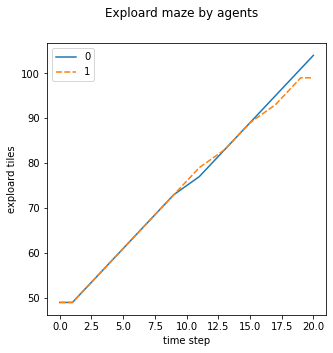

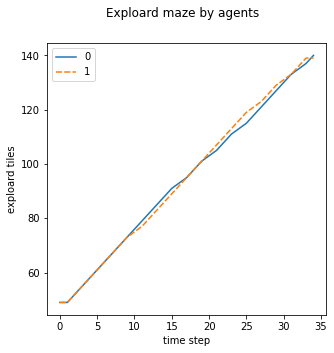

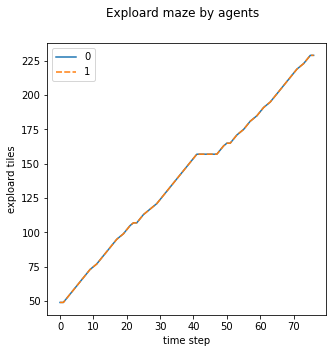

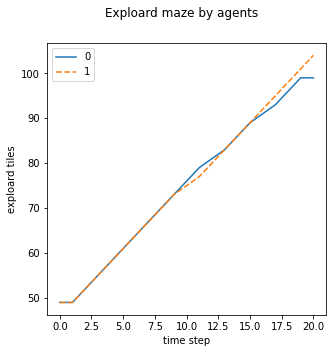

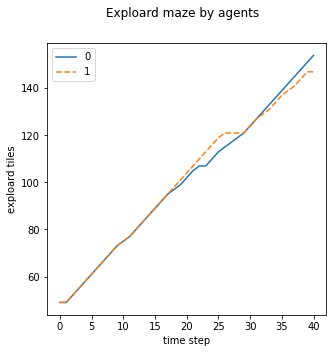

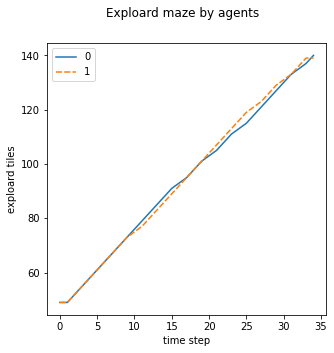

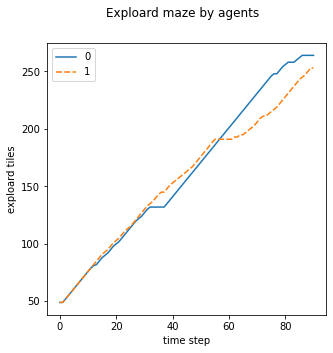

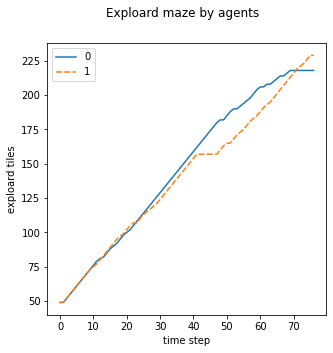

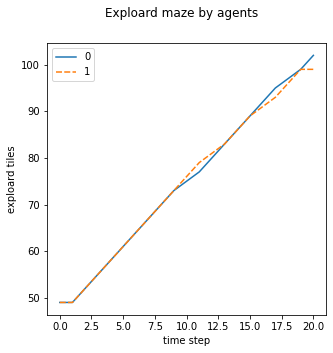

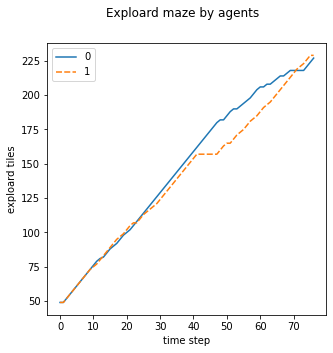

In [5]:
plot_batch(read_data('2_pathfinding_agents'))

'Explored' consists of a exploration-map from each agent.

__Experiment 2__

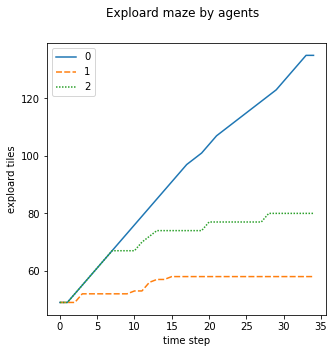

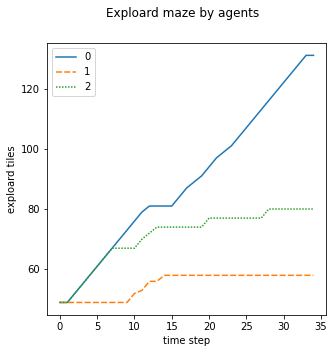

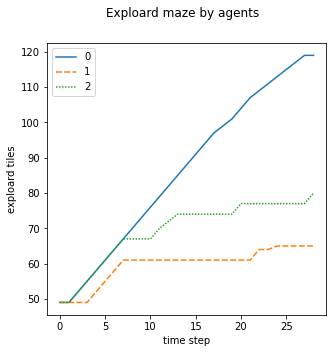

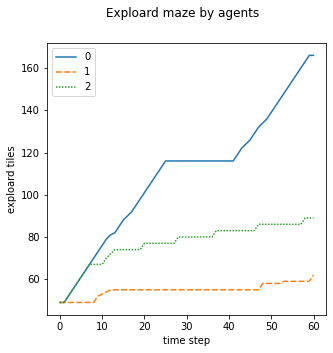

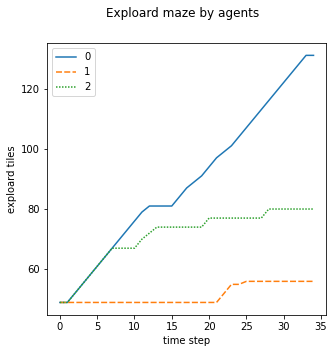

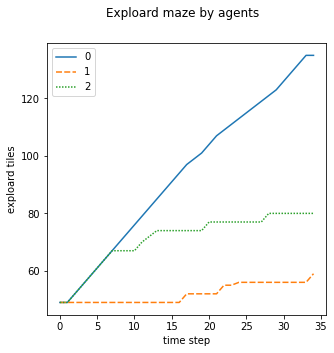

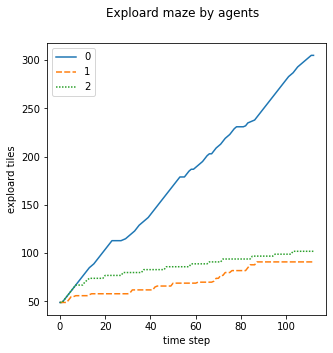

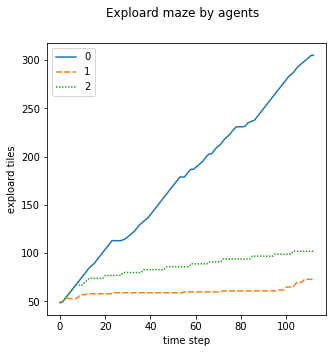

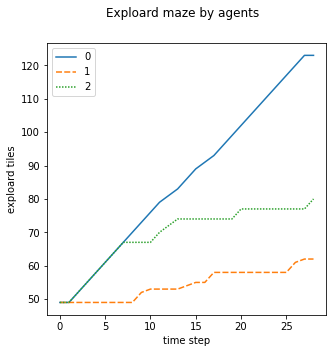

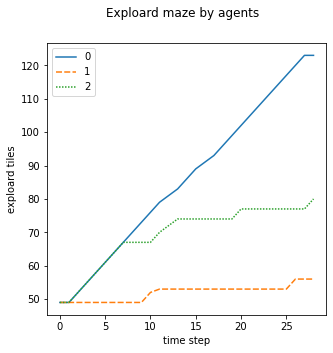

In [6]:
plot_batch(read_data('1_pathfinding_1_random_agents'))

__Experiment 3__

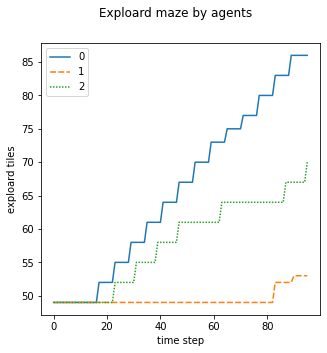

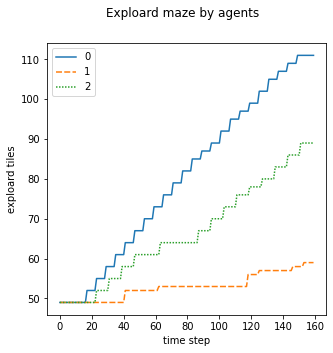

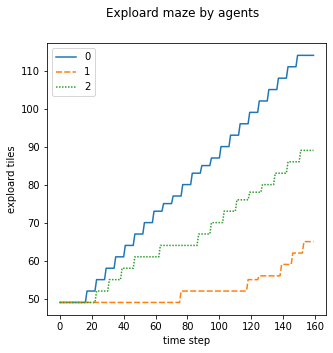

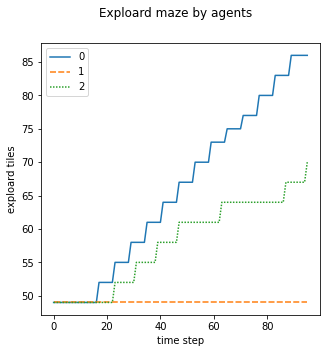

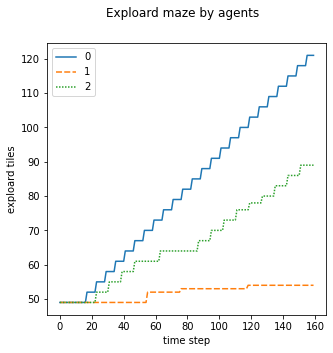

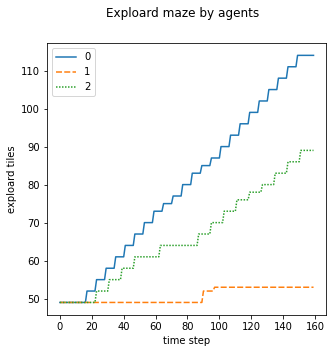

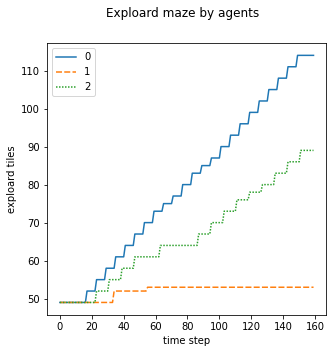

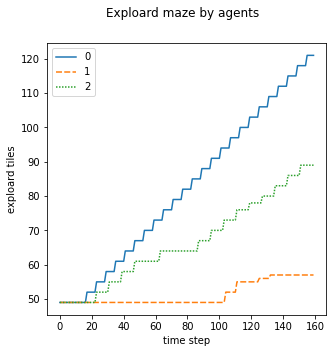

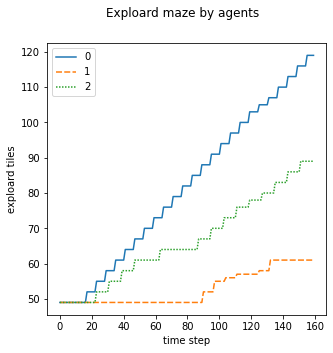

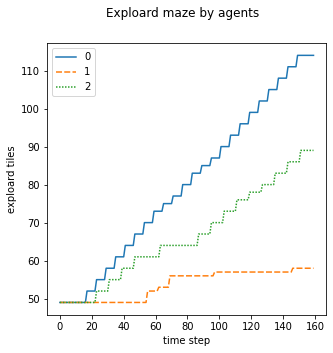

In [7]:
plot_batch(read_data('1_pathfinding_1_random_speed_agent'))

__Experiment 4__

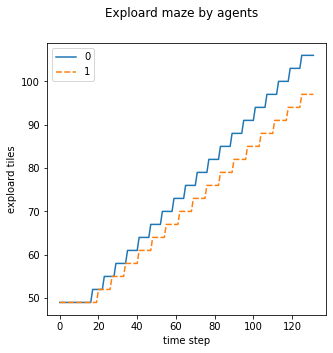

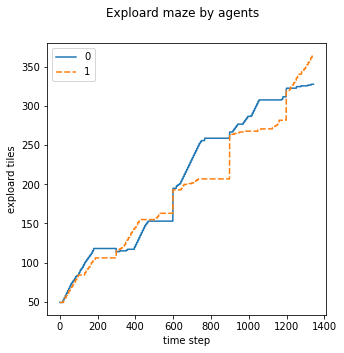

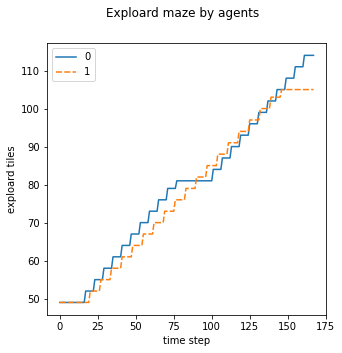

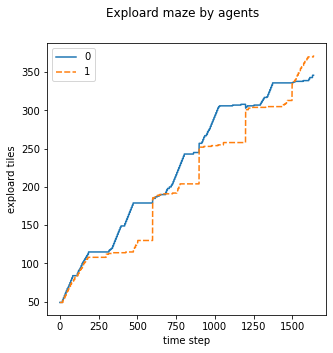

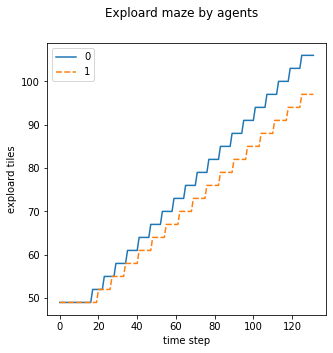

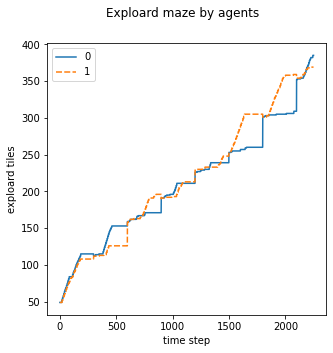

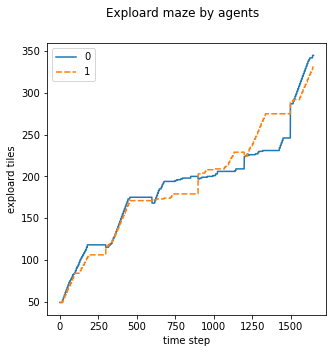

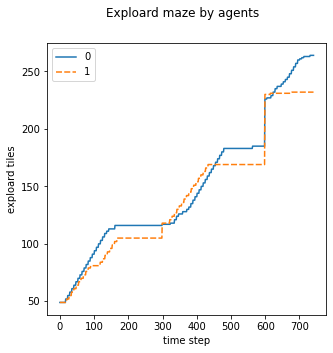

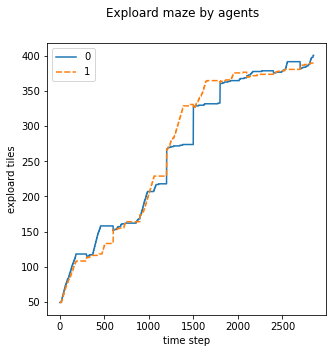

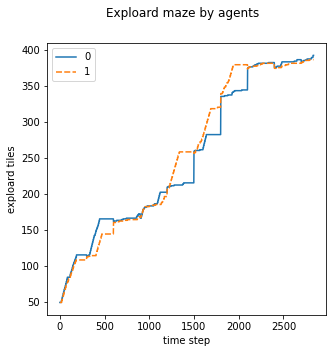

In [8]:
plot_batch(read_data('2_pathfinding_speed_agents'))

### Resultaten plotten


Ik weet niet zeker of we dit hier kwijt kunnen :)
### Beschouwing van de impact van het werk